In [120]:
%pylab inline

import pandas as pd
import seaborn as sns



Populating the interactive namespace from numpy and matplotlib


/Users/silas/miniconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Here we have a combined table from the data of 
Hip fractions:

    Cauley, J.A., et al., Geographic and ethnic disparities in osteoporotic fractures. Nat Rev Endocrinol, 2014. 10(6): p. 338-51.


Latitudes of the countries often the capital 
    http://www.csgnetwork.com/
Temperature:

    The World bank (databank.worldbank.org)
    
Vitamin D:

    Wahl, D. A. et al. A global representation of vitamin D status in healthy populations. Arch. Osteoporos. 7, 155–172 (2012). doi: 10.1007/s11657-012-0093-0


Calcium intake:

    Balk, E. M. et al. Global dietary calcium intake among adults: a systematic review. Osteoporosis International 28, 3315–3324 (2017). doi:10.1007/s00198-017-4230-x



In [121]:
D= pd.read_excel('../data/Data_for_correlations.xlsx',index_col=0)


In [122]:
# Have a look at the missing values
D.loc[D.isnull().any(1)]

,Continent,Men,Women,Total,Temperature,Latitude,VitaminD,Calcium,Sunlight
Country,,,,,,,,,
Nigeria,Africa,2,2,2.0,32.8,9,NaN,636.0,2669.080000
Hong Kong,Asia,149,324,230.0,26.0,22,NaN,NaN,1835.600000
Indonesia,Asia,59,173,119.0,30.6,6,NaN,342.0,2983.300000
Malaysia,Asia,114,269,205.0,29.6,3,44.400000,399.0,NaN
Philippines,Asia,48,133,93.0,30.1,14,NaN,440.0,2103.100000
Singapore,Asia,156,331,248.0,30.3,1,NaN,794.0,2022.400000
Taiwan,Asia,186,355,264.0,NaN,25,76.500000,587.0,1886.866667
Croatia,Europe,135,177,157.0,15.6,45,NaN,965.0,1913.000000
Hungary,Europe,207,371,282.0,14.7,47,NaN,673.0,1988.000000


In [123]:
Labels={
    'Temperature':'Average day temperature [°C]',
    'Total': 'Age-standardized Incidence\nof Hip Fracture (per 100,000)',
    'Latitude':'Distance from equator [°]',
    'Women':'age-standardized incidence\nof hip fracture in women (per 100,000)',
    'VitaminD': 'Average serum vitamin D levels\n[25(OH)D (nmol/L)]',
    'Calcium': 'Average dietary calcium intake [mg/d]',
    'Sunlight': 'Sunshine [h/y]'
    
}

In [124]:
D.columns

Index(['Continent', 'Men', 'Women', 'Total', 'Temperature', 'Latitude',
       'VitaminD', 'Calcium', 'Sunlight'],
      dtype='object')

In [125]:
%run scripts.py
plotting_Setup()

In [126]:
# Define function for correlation

from scipy.stats import pearsonr
import shutil
import statsmodels.api as sm


save_plot_params=dict(formats=['.pdf'])

def add_stats(x,y,ax):

    corelation= pearsonr(x,y)

    sign= "r={0:.2f}, p={1:.2g}".format(*corelation)

    legend_args=dict(fontsize=12, verticalalignment='center', transform=ax.transAxes)
    
    if corelation[0]<0:
    
        ax.text(0.1,0.1,sign,horizontalalignment='left',**legend_args)
    else:
        ax.text(0.9,0.1,sign,horizontalalignment='right',**legend_args)
    

def cor_plot(var1='Temperature',var2='Total',data=D):

    f= plt.figure(figsize=(5,5))

    df=data[[var1,var2]].dropna()

    ax=sns.regplot(y=var1,x=var2,data=df)
    
    add_stats(df[var1],df[var2],ax)

    ax.set_ylabel(Labels[var1])
    ax.set_xlabel(Labels[var2])
    

    figure_name=f"{var1}_vs_{var2}"
    saveplot(figure_name,**save_plot_params)

    
    
def partial_corr(x,y,other,labels=None):
    
    data= D.loc[~D[[x,y,other]].isnull().any(1)]
    
    print(f"use the data for {data.shape[0]} countries")

    _,residuals = sm.graphics.plot_partregress( x,y,other, ret_coords=True,
                                                   obs_labels=False,data=data)

    f= plt.figure(figsize=(5,5))

    ax=sns.regplot(*residuals)

    add_stats(*residuals,ax)
    
    if labels is None:
        labels=(x,y,other)

    ax.set_xlabel(f'e({labels[0]} | {labels[2]})')
    ax.set_ylabel(f'e({labels[1]} | {labels[2]})')
    
    saveplot(f"partcorr_{x}_vs_{y}_corrected_{other}",**save_plot_params)

,Women,Total,Temperature,Latitude,VitaminD,Calcium,Sunlight
Women,1.000000,0.976509,-0.497737,0.474587,-0.011263,0.334761,-0.377631
Total,0.976509,1.000000,-0.484672,0.476723,-0.006433,0.314915,-0.355166
Temperature,-0.497737,-0.484672,1.000000,-0.873089,-0.045954,-0.538071,0.603745
Latitude,0.474587,0.476723,-0.873089,1.000000,-0.215393,0.682086,-0.449309
VitaminD,-0.011263,-0.006433,-0.045954,-0.215393,1.000000,-0.188614,-0.022929
Calcium,0.334761,0.314915,-0.538071,0.682086,-0.188614,1.000000,-0.325609
Sunlight,-0.377631,-0.355166,0.603745,-0.449309,-0.022929,-0.325609,1.000000


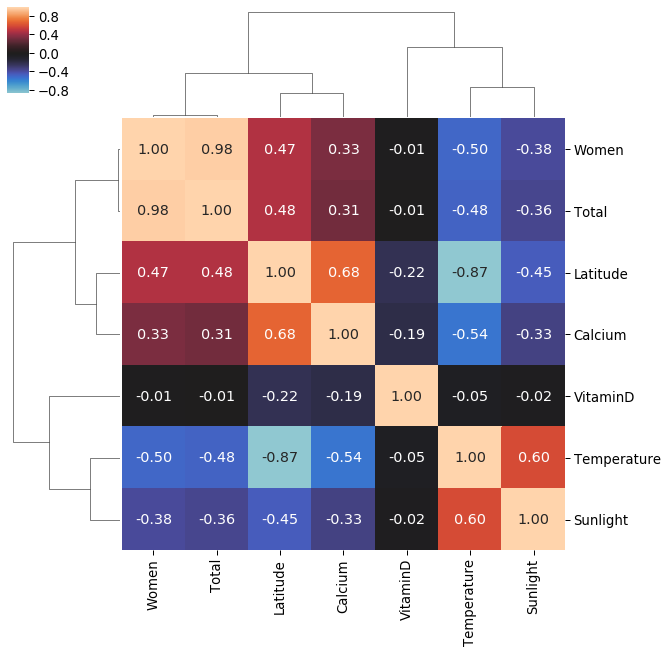

In [127]:
sns.clustermap(D.corr(),center=0,annot=True,fmt='.2f')
D.corr()

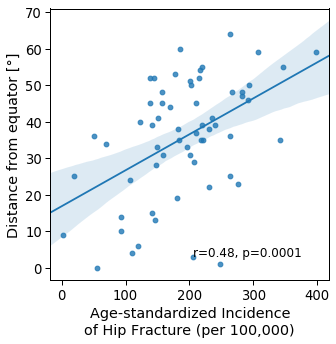

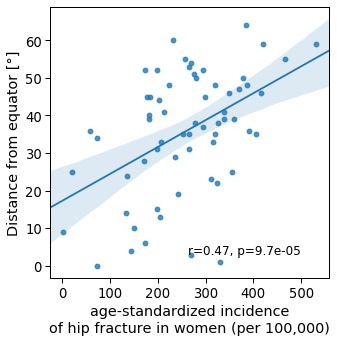

In [128]:
cor_plot(var1='Latitude',var2='Total')
cor_plot(var1='Latitude',var2='Women')

#association i

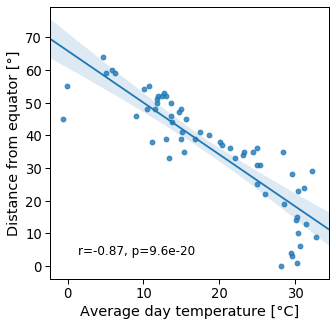

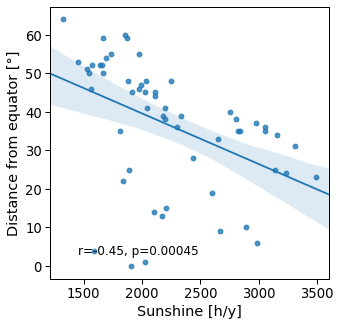

In [130]:

cor_plot(var1='Latitude',var2='Temperature')

cor_plot(var1='Latitude',var2='Sunlight')

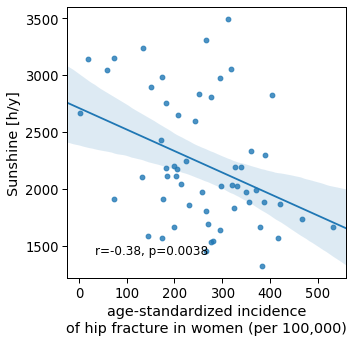

In [132]:
cor_plot(var1='Sunlight',var2='Women')

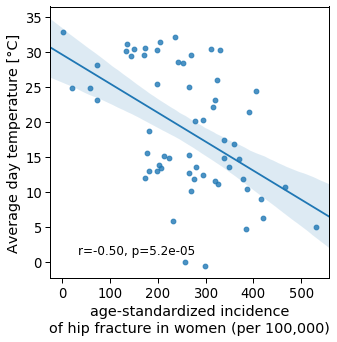

In [133]:
cor_plot(var1='Temperature',var2='Women')

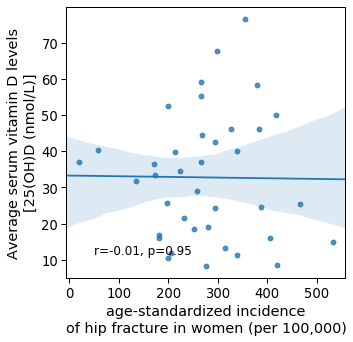

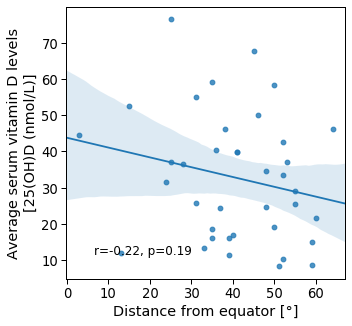

In [94]:
cor_plot(var1='VitaminD',var2='Women')
#cor_plot(var1='VitaminD',var2='Temperature')
cor_plot(var1='VitaminD',var2='Latitude')






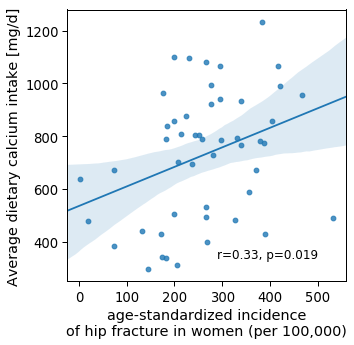

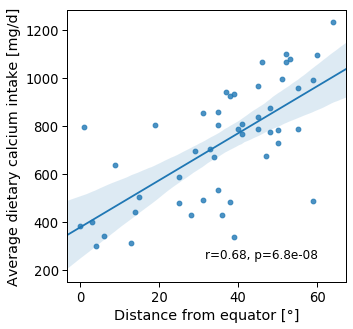

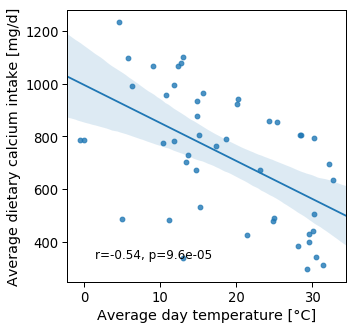

In [96]:
cor_plot(var1='Calcium',var2='Women')
cor_plot(var1='Calcium',var2='Latitude')
cor_plot(var1='Calcium',var2='Temperature')
#cor_plot(var1='Calcium',var2='VitaminD')

use the data for 47 countries


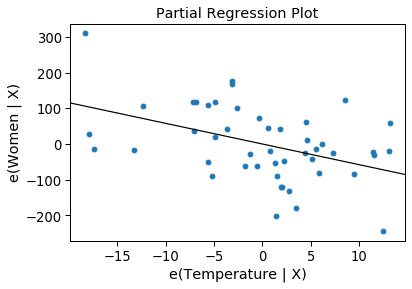

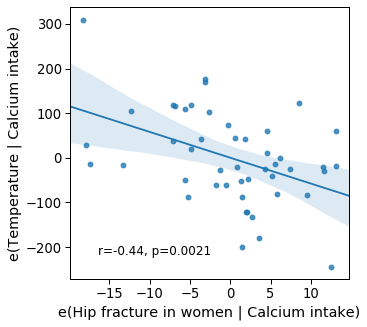

In [99]:
partial_corr("Women","Temperature", "Calcium",
             labels=('Hip fracture in women','Temperature','Calcium intake'))

In [100]:
!open ..

use the data for 49 countries


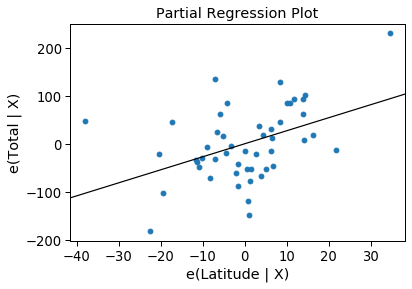

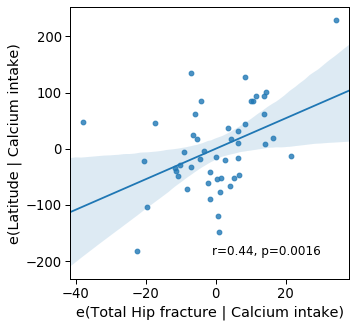

In [40]:
partial_corr("Total","Latitude", "Calcium",
             labels=('Total Hip fracture','Latitude','Calcium intake'))

use the data for 57 countries


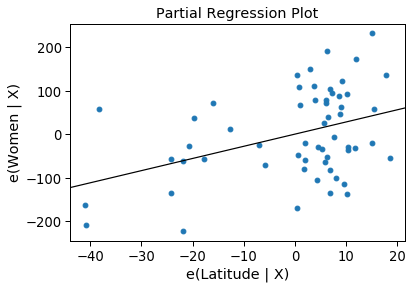

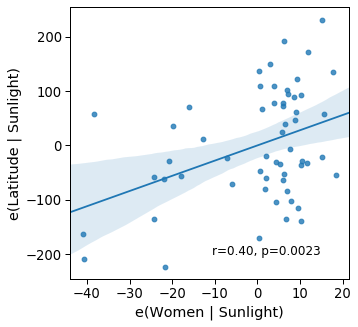

In [149]:
partial_corr("Women", "Latitude", "Sunlight")

use the data for 59 countries


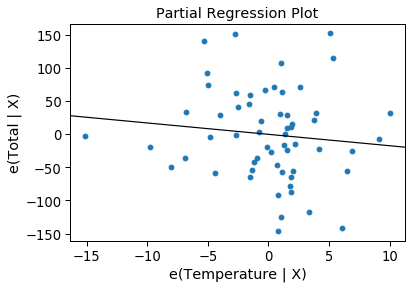

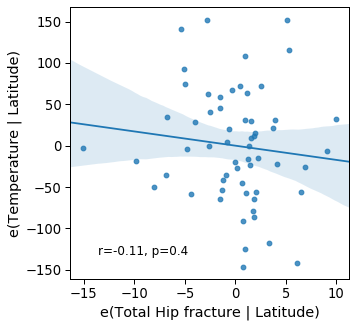

In [35]:
partial_corr("Total","Temperature", "Latitude",
             labels=('Total Hip fracture','Temperature','Latitude'))

use the data for 59 countries


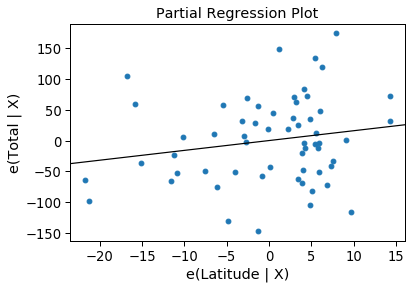

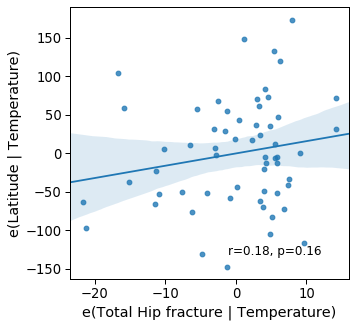

In [34]:
partial_corr("Total", "Latitude","Temperature",
             labels=('Total Hip fracture','Latitude','Temperature'))

use the data for 57 countries


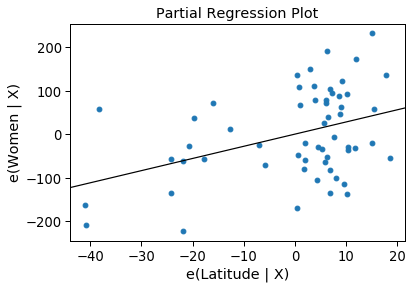

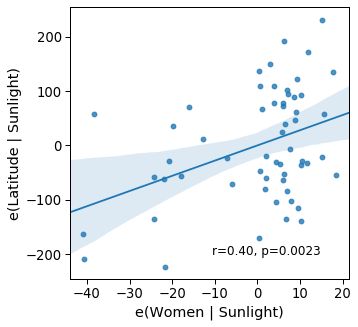

In [151]:
partial_corr("Women","Latitude", "Sunlight")

# Regression 

In [80]:


from statsmodels.formula.api import ols

## Simple model with only temperature

In [85]:
model_temp = ols("Women ~ Temperature", data=D).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Women   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     19.10
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           5.20e-05
Time:                        09:40:57   Log-Likelihood:                -356.86
No. Observations:                  60   AIC:                             717.7
Df Residuals:                      58   BIC:                             721.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     371.8904     28.489     13.054      0.000     314.864     428.917
Temperature    -5.9666      1.365     -4.370      0.000      -8.699      -3.234
==============================================================================
Omnibus:                        1.802   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.278
Skew:                          -0.087   Prob(JB):                        0.528
Kurtosis:                       2.307   Cond. No.                         49.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

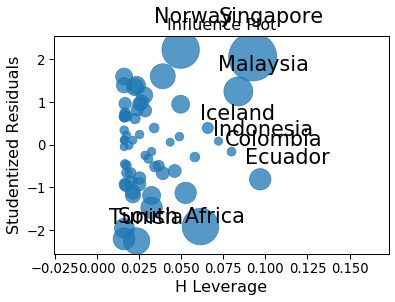

In [88]:
fig = sm.graphics.influence_plot(model_temp, criterion="cooks")

In [89]:
# Hip mm

In [90]:
model_lat = ols("Women ~ Latitude", data=D).fit()
model_lat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Women   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     17.44
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           9.74e-05
Time:                        09:41:20   Log-Likelihood:                -369.32
No. Observations:                  62   AIC:                             742.6
Df Residuals:                      60   BIC:                             746.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    146.8022     29.588      4.962      0.000      87.617     205.988
Latitude       3.1454      0.753      4.176      0.000       1.639       4.652
==============================================================================
Omnibus:                        0.691   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.774
Skew:                          -0.112   Prob(JB):                        0.679
Kurtosis:                       2.500   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

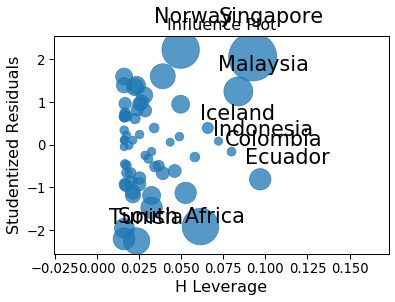

In [91]:
fig = sm.graphics.influence_plot(model_lat, criterion="cooks")

In [78]:
data.loc[['Singapore','Norway']]

,Continent,Men,Women,Total,Temperature,Latitude,VitaminD,Calcium
Country,,,,,,,,
Singapore,Asia,156,331,248.0,30.3,1,NaN,794.0
Norway,Europe,281,532,399.0,5.0,59,14.831607,488.0


## Multivariade model

In [44]:
# Take data with no missing values
data= D.loc[~D[['Temperature','Calcium','Total','Latitude']].isnull().any(1)]

print(f"Use data for {data.shape[0]} countries with all values")


Use data for 47 countries with all values


In [92]:
model = ols("Total ~ Calcium + Temperature ", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     8.240
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           0.000913
Time:                        09:50:35   Log-Likelihood:                -265.65
No. Observations:                  47   AIC:                             537.3
Df Residuals:                      44   BIC:                             542.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     249.9487     55.010      4.544      0.000     139.083     360.815
Calcium         0.0275      0.050      0.549      0.586      -0.073       0.129
Temperature    -4.1441      1.339     -3.095      0.003      -6.843      -1.446
==============================================================================
Omnibus:                        0.731   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.687
Skew:                           0.275   Prob(JB):                        0.709
Kurtosis:                       2.782   Cond. No.                     4.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

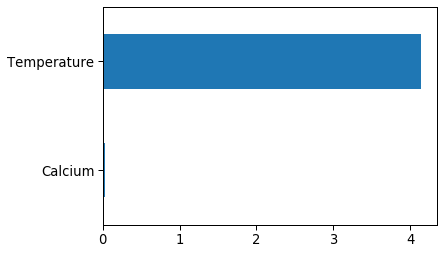

In [93]:
pd.Series(model.params).abs().iloc[1:].sort_values().plot.barh()

## Marginal model

In [30]:
data= D.loc[~D[['Temperature','Latitude','Total']].isnull().any(1)]
print(f"Use data for {data.shape[0]} countries with all values")
model = ols("Total ~ Latitude + Temperature", data=data).fit()
model.summary()

Use data for 59 countries with all values


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     9.891
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           0.000210
Time:                        16:10:19   Log-Likelihood:                -332.24
No. Observations:                  59   AIC:                             670.5
Df Residuals:                      56   BIC:                             676.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     166.8938     77.508      2.153      0.036      11.626     322.162
Latitude        1.5956      1.134      1.407      0.165      -0.676       3.867
Temperature    -1.7211      2.059     -0.836      0.407      -5.847       2.404
==============================================================================
Omnibus:                        0.450   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.478
Skew:                           0.196   Prob(JB):                        0.787
Kurtosis:                       2.796   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:


model = ols("Total ~ Calcium + Temperature", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     8.240
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           0.000913
Time:                        16:06:13   Log-Likelihood:                -265.65
No. Observations:                  47   AIC:                             537.3
Df Residuals:                      44   BIC:                             542.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     249.9487     55.010      4.544      0.000     139.083     360.815
Calcium         0.0275      0.050      0.549      0.586      -0.073       0.129
Temperature    -4.1441      1.339     -3.095      0.003      -6.843      -1.446
==============================================================================
Omnibus:                        0.731   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.687
Skew:                           0.275   Prob(JB):                        0.709
Kurtosis:                       2.782   Cond. No.                     4.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
data= D.loc[~D[["Total", "Latitude", "VitaminD"]].isnull().any(1)]


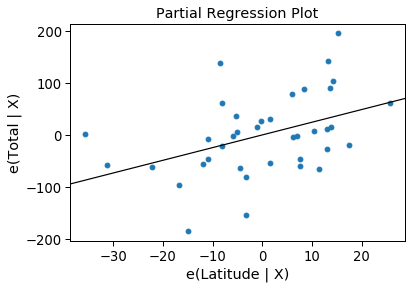

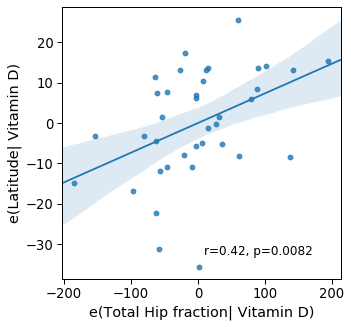

In [22]:
_,residuals = sm.graphics.plot_partregress("Total", "Latitude", "VitaminD" , ret_coords=True,
                                               obs_labels=False,data=data)

residuals = tuple(reversed(residuals)) # invert y and y to be conform to other plots

f= plt.figure(figsize=(5,5))

ax=sns.regplot(*residuals)

add_stats(*residuals,ax)

ax.set_xlabel('e(Total Hip fraction| Vitamin D)')
ax.set_ylabel('e(Latitude| Vitamin D)')


saveplot("partial_correlation_latitude_total",figurefolder='human_figures',formats=['.pdf'])